## Importing Data

In [1]:
import pandas as pd
data = pd.read_csv("raw_data.csv")
reviews_data = data["review"]
reviews_data

0       I don't know if anybody else is having this pr...
1       Not working for me. Alerts appear in notificat...
2       The old layout was easier to navigate. You cou...
3       Love this App! Have the ability to track weath...
4       Good app. However the new version makes seeing...
                              ...                        
1113                               Great helpful detailed
1114      My tax money finally paid for something useful.
1115    App is easy to use and contains wide array of ...
1116                                             Good app
1117                       This is the official FEMA App.
Name: review, Length: 1118, dtype: object

## Lemmatizing words to convert aspects to their base form

In [2]:
from nltk.stem import WordNetLemmatizer

wm = WordNetLemmatizer()
import re 

reviews = []

for i in range(0,len(reviews_data)):
    review = re.sub("\.\.+", ". ", str(reviews_data[i]))
    review = review.lower()
    words_list = [wm.lemmatize(word) for word in review.split()]
    review = " ".join(words_list)
    reviews.append(review)
    
reviews

["i don't know if anybody else is having this problem or if it's just me, but this app is not working a well a the old one did. the old one wa pretty straightforward. i'd get it alert on my phone i click on it and i would get the alert. tonight we are under severe thunderstorm watches, and i have so far received no notifications. however if i open the app the alert are there. and i have to click through to find the app. the old one wa much better and easier to use!",
 "not working for me. alert appear in notifications, open app, can't find them. click on the 3 city i monitor but no info.",
 "the old layout wa easier to navigate. you could have kept that and just added the new parts. i used to use this app alot with my work on the fire department. i think i'll have to find something else.",
 'love this app! have the ability to track weather for not only myself, am able to track the weather when traveling. i absolutely feel safer having this app on my phone.',
 'good app. however the new

## Splitting sentences in a review

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")

sentence_list = []

for statement in reviews:
    tagged = nlp(statement)
    for sent in tagged.sents:
        sentence_list.append((str(sent)))
    
sentence_list

["i don't know if anybody else is having this problem or if it's just me, but this app is not working a well a the old one did.",
 'the old one wa pretty straightforward.',
 "i'd get it alert on my phone i click on it and i would get the alert.",
 'tonight we are under severe thunderstorm watches, and i have so far received no notifications.',
 'however if i open the app the alert are there.',
 'and i have to click through to find the app.',
 'the old one wa much better and easier to use!',
 'not working for me.',
 "alert appear in notifications, open app, can't find them.",
 'click on the 3 city i monitor but no info.',
 'the old layout wa easier to navigate.',
 'you could have kept that and just added the new parts.',
 'i used to use this app alot with my work on the fire department.',
 "i think i'll have to find something else.",
 'love this app!',
 'have the ability to track weather for not only myself, am able to track the weather when traveling.',
 'i absolutely feel safer having

## Splitting sentences with 'comma' seperation

In [4]:
sentence_list_final = []

for sentence in sentence_list:
    sentences = sentence.split(", ")
    for s in sentences:
        sentence_list_final.append(s)
        
sentence_list_tagged = []
for sentence in sentence_list_final:
    tagged = nlp(sentence)
    
    sentence_list_tagged.append(tagged)
    
sentence_list_tagged

[i don't know if anybody else is having this problem or if it's just me,
 but this app is not working a well a the old one did.,
 the old one wa pretty straightforward.,
 i'd get it alert on my phone i click on it and i would get the alert.,
 tonight we are under severe thunderstorm watches,
 and i have so far received no notifications.,
 however if i open the app the alert are there.,
 and i have to click through to find the app.,
 the old one wa much better and easier to use!,
 not working for me.,
 alert appear in notifications,
 open app,
 can't find them.,
 click on the 3 city i monitor but no info.,
 the old layout wa easier to navigate.,
 you could have kept that and just added the new parts.,
 i used to use this app alot with my work on the fire department.,
 i think i'll have to find something else.,
 love this app!,
 have the ability to track weather for not only myself,
 am able to track the weather when traveling.,
 i absolutely feel safer having this app on my phone.,
 goo

# Splitting sentence with conjunctions

In [5]:
sentence_list_final = []

# Splitting sentences based on conjunction words
for s1 in sentence_list_tagged:
    split_sentences_1 = str(s1).split(" and ")
    for s2 in split_sentences_1:
        split_sentences_2 = str(s2).split(" but ")
        for s3 in split_sentences_2:
            split_sentences_3 = str(s3).split(" or ")
            
            for s in split_sentences_3:
                sentence_list_final.append(s)
    
# Converting into tagged sentence
sentence_list_tagged = []
for sentence in sentence_list_final:
    sent = sentence.lower()
    tagged = nlp(sent)
    
    sentence_list_tagged.append(tagged)
    
sentence_list_tagged

[i don't know if anybody else is having this problem,
 if it's just me,
 but this app is not working a well a the old one did.,
 the old one wa pretty straightforward.,
 i'd get it alert on my phone i click on it,
 i would get the alert.,
 tonight we are under severe thunderstorm watches,
 and i have so far received no notifications.,
 however if i open the app the alert are there.,
 and i have to click through to find the app.,
 the old one wa much better,
 easier to use!,
 not working for me.,
 alert appear in notifications,
 open app,
 can't find them.,
 click on the 3 city i monitor,
 no info.,
 the old layout wa easier to navigate.,
 you could have kept that,
 just added the new parts.,
 i used to use this app alot with my work on the fire department.,
 i think i'll have to find something else.,
 love this app!,
 have the ability to track weather for not only myself,
 am able to track the weather when traveling.,
 i absolutely feel safer having this app on my phone.,
 good app.,
 

## Checking POS tags

In [6]:
for sentence in sentence_list_tagged:
    for word in sentence:
        print(word.text, word.pos_, word.dep_)
        pass

i PRON nsubj
do AUX aux
n't PART neg
know VERB ROOT
if SCONJ mark
anybody PRON nsubj
else ADV advmod
is AUX aux
having VERB ccomp
this DET det
problem NOUN dobj
if SCONJ mark
it PRON nsubj
's AUX ROOT
just ADV advmod
me PRON attr
but CCONJ cc
this DET det
app NOUN nsubj
is AUX aux
not PART neg
working VERB ROOT
a DET det
well ADV advmod
a DET det
the DET det
old ADJ amod
one NOUN nsubj
did VERB advcl
. PUNCT punct
the DET det
old ADJ amod
one NOUN nsubj
wa VERB ROOT
pretty ADV advmod
straightforward ADJ acomp
. PUNCT punct
i PRON nsubj
'd AUX aux
get VERB ROOT
it PRON nsubj
alert ADJ ccomp
on ADP prep
my PRON poss
phone NOUN pobj
i PRON nsubj
click VERB ccomp
on ADP prep
it PRON pobj
i PRON nsubj
would AUX aux
get VERB ROOT
the DET det
alert NOUN dobj
. PUNCT punct
tonight NOUN npadvmod
we PRON nsubj
are AUX ROOT
under ADP prep
severe ADJ amod
thunderstorm NOUN compound
watches NOUN pobj
and CCONJ cc
i PRON nsubj
have AUX aux
so ADV advmod
far ADV advmod
received VERB ROOT
no DET det
n

## Applying Vader Sentiment Analysis Model to our statments

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment_list = []

vad = SentimentIntensityAnalyzer()

for i,sentence in enumerate(sentence_list_tagged):
    polarity_dict = vad.polarity_scores(str(sentence))
    
    if polarity_dict["compound"] == 0:
        sentiment_list.append([str(sentence), [token.text for token in sentence if token.pos_ == "NOUN" and (token.dep_ == "nsubj" or token.dep_ == "ROOT")], "Neutral"])
        
    elif polarity_dict["compound"] > 0:
        sentiment_list.append([str(sentence),[token.text for token in sentence if token.pos_ == "NOUN" and (token.dep_ == "nsubj" or token.dep_ == "ROOT")],"Positive"])
        
    else:
        sentiment_list.append([str(sentence),[token.text for token in sentence if token.pos_ == "NOUN" and (token.dep_ == "nsubj" or token.dep_ == "ROOT")],"Negative"])
        
sentiment_list

[["i don't know if anybody else is having this problem", [], 'Negative'],
 ["if it's just me", [], 'Neutral'],
 ['but this app is not working a well a the old one did.',
  ['app', 'one'],
  'Negative'],
 ['the old one wa pretty straightforward.', ['one'], 'Positive'],
 ["i'd get it alert on my phone i click on it", [], 'Positive'],
 ['i would get the alert.', [], 'Positive'],
 ['tonight we are under severe thunderstorm watches', [], 'Negative'],
 ['and i have so far received no notifications.', [], 'Negative'],
 ['however if i open the app the alert are there.', ['alert'], 'Positive'],
 ['and i have to click through to find the app.', [], 'Neutral'],
 ['the old one wa much better', ['one'], 'Positive'],
 ['easier to use!', [], 'Positive'],
 ['not working for me.', [], 'Neutral'],
 ['alert appear in notifications', [], 'Positive'],
 ['open app', [], 'Neutral'],
 ["can't find them.", [], 'Neutral'],
 ['click on the 3 city i monitor', [], 'Neutral'],
 ['no info.', ['info'], 'Negative'],
 

## Converting results into Dataset

In [8]:
import pandas as pd

data = pd.DataFrame(sentiment_list, columns = ["Text", "Aspect", "Sentiment"])

## Dropping rows determining no aspects

In [9]:
index_list = []

for i in range(len(data)):
    if data["Aspect"][i] == []:
        index_list.append(i)
        
data = data.drop(index_list, axis = 0)
data

,Text,Aspect,Sentiment
2,but this app is not working a well a the old o...,"[app, one]",Negative
3,the old one wa pretty straightforward.,[one],Positive
8,however if i open the app the alert are there.,[alert],Positive
10,the old one wa much better,[one],Positive
17,no info.,[info],Negative
...,...,...,...
3305,iphone port.,[port],Neutral
3308,no info on prepping for the zombie apocalypse?...,[info],Negative
3310,but the map is very sluggish.,[map],Negative
3315,my tax money finally paid for something useful.,[money],Positive


### Converting Sentiments into numeric representations

In [10]:
def sentiment_score(row):
    if row["Sentiment"] == "Positive":
        return 5
    
    elif row["Sentiment"] == "Neutral":
        return 3
    
    elif row["Sentiment"] == "Negative":
        return 1
    
data["Score"] = data.apply(sentiment_score, axis = 1)
data

,Text,Aspect,Sentiment,Score
2,but this app is not working a well a the old o...,"[app, one]",Negative,1
3,the old one wa pretty straightforward.,[one],Positive,5
8,however if i open the app the alert are there.,[alert],Positive,5
10,the old one wa much better,[one],Positive,5
17,no info.,[info],Negative,1
...,...,...,...,...
3305,iphone port.,[port],Neutral,3
3308,no info on prepping for the zombie apocalypse?...,[info],Negative,1
3310,but the map is very sluggish.,[map],Negative,1
3315,my tax money finally paid for something useful.,[money],Positive,5


In [11]:
data.to_csv("output_FEMA.csv")

### Checking aspects mentioned in most reviews

In [12]:
aspect_list = []

for data_aspect_list in data["Aspect"]:
    for aspect in data_aspect_list:
        aspect_list.append(aspect)

from nltk.probability import FreqDist

freq_counter = FreqDist()

for aspect in aspect_list:
    freq_counter[aspect] += 1
    
aspects_count = pd.DataFrame.from_dict(freq_counter, orient = "index", columns = ["Count"])
aspects_count = aspects_count.sort_values(by = "Count", ascending = False)
aspects_count

,Count
app,170
alert,48
info,22
thanks,22
notification,19
...,...
guideline,1
threat,1
network,1
atmosphere,1


### Finding Average Aspect Rating

In [13]:
aspects_unique = aspects_count.index.to_list()
aspects_unique

['app',
 'alert',
 'info',
 'thanks',
 'notification',
 'information',
 'warning',
 'alerts',
 'weather',
 'update',
 'government',
 'phone',
 'people',
 'map',
 'warnings',
 'work',
 'time',
 'thing',
 'lot',
 'button',
 'way',
 'option',
 'apps',
 'help',
 'service',
 'location',
 'one',
 'developer',
 'sound',
 'family',
 'list',
 'disaster',
 'idea',
 'program',
 'emergency',
 'others',
 'ability',
 'notifications',
 'resource',
 'management',
 'point',
 'type',
 'storms',
 'hurricane',
 'job',
 'change',
 'state',
 'storm',
 'display',
 'problem',
 'u',
 'feature',
 'capability',
 'shelter',
 'country',
 'star',
 'download',
 'assistance',
 'stuff',
 'tool',
 'place',
 'kind',
 'tip',
 'support',
 'test',
 'radio',
 'design',
 'version',
 'doe',
 'none',
 'experience',
 'conditions',
 'camp',
 'crash',
 'camera',
 'engineer',
 'county',
 'fact',
 'choice',
 'peace',
 'child',
 'waste',
 'road',
 'wifi',
 'issue',
 'organization',
 'ups',
 'love',
 'parent',
 'start',
 'advisory',


In [14]:
aspect_rating_list = []

for aspect in aspects_unique:
    rating_sum = 0
    
    for  i in range(len(data)):
        for a in data["Aspect"].iloc[i]:
            if a == aspect:
                rating_sum += data["Score"].iloc[i]
    
    aspect_rating_list.append(rating_sum)

aspect_rating_list

[614,
 210,
 72,
 110,
 51,
 70,
 29,
 41,
 42,
 38,
 31,
 26,
 20,
 16,
 8,
 34,
 28,
 25,
 27,
 23,
 25,
 17,
 24,
 26,
 26,
 20,
 18,
 24,
 16,
 15,
 15,
 9,
 21,
 17,
 9,
 14,
 20,
 10,
 16,
 6,
 8,
 10,
 14,
 12,
 20,
 12,
 8,
 12,
 11,
 7,
 9,
 15,
 11,
 7,
 13,
 11,
 9,
 7,
 13,
 13,
 11,
 5,
 15,
 15,
 9,
 11,
 15,
 11,
 9,
 7,
 11,
 6,
 4,
 2,
 6,
 6,
 6,
 2,
 6,
 10,
 4,
 2,
 6,
 2,
 8,
 8,
 6,
 10,
 2,
 10,
 6,
 2,
 6,
 6,
 4,
 6,
 6,
 8,
 6,
 8,
 6,
 8,
 10,
 4,
 10,
 10,
 4,
 4,
 8,
 6,
 6,
 6,
 4,
 10,
 8,
 4,
 8,
 8,
 6,
 8,
 8,
 6,
 10,
 6,
 4,
 4,
 10,
 8,
 4,
 6,
 10,
 6,
 5,
 5,
 3,
 5,
 1,
 1,
 3,
 5,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 5,
 3,
 1,
 3,
 1,
 1,
 1,
 5,
 3,
 5,
 5,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 5,
 5,
 3,
 3,
 1,
 3,
 1,
 1,
 5,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 5,
 1,
 3,
 3,
 3,
 5,
 5,
 5,
 1,
 1,
 3,
 3,
 3,
 5,
 5,
 5,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 1,

In [15]:
aspects_count["Rating_Sum"] = aspect_rating_list

In [16]:
aspects_count["Rating"] = round((aspects_count["Rating_Sum"]/aspects_count["Count"]),1)
aspects_count.to_csv("aspect_ratings.csv")
aspects_count

,Count,Rating_Sum,Rating
app,170,614,3.6
alert,48,210,4.4
info,22,72,3.3
thanks,22,110,5.0
notification,19,51,2.7
...,...,...,...
guideline,1,3,3.0
threat,1,1,1.0
network,1,5,5.0
atmosphere,1,1,1.0


### Visualization

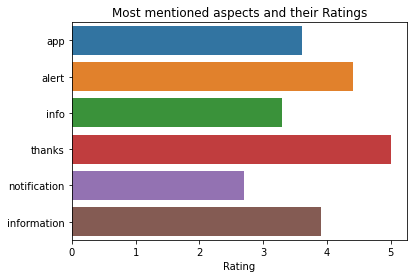

In [17]:
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

aspects_count_plot = aspects_count.head(6)

sns.barplot(y = aspects_count_plot.index, x = aspects_count_plot["Rating"])
plt.title("Most mentioned aspects and their Ratings", loc = "center")
plt.xticks(rotation =0)
plt.show()

#### Word Cloud

In [18]:
data_pos = aspects_count[aspects_count["Rating"]>3]
data_neu = aspects_count[aspects_count["Rating"]==3]
data_neg = aspects_count[aspects_count["Rating"]<3]

pos_list = []
neg_list = []
neu_list = []

for i,count in enumerate(data_pos["Count"]):
    for j in range(count):
        pos_list.append(data_pos.index[i])

for i,count in enumerate(data_neu["Count"]):
    for j in range(count):
        neu_list.append(data_neu.index[i])
        
for i,count in enumerate(data_neg["Count"]):
    for j in range(count):
        neg_list.append(data_neg.index[i])
        
data_pos = " ".join(pos_list)
data_neg = " ".join(neg_list)
data_neu = " ". join(neu_list)

#### Creating WordCloud for Positive Aspects

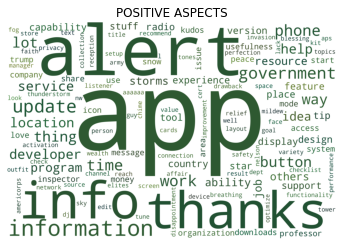

In [19]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image

green_mask = np.array(Image.open("green_pattern.jpg"))
green_color = ImageColorGenerator(green_mask)

wc1 = WordCloud(mask = green_mask, color_func = green_color, background_color = "white", collocations = False).generate(data_pos)

plt.imshow(wc1)
plt.title("POSITIVE ASPECTS")
plt.axis("off")
plt.show()

#### Creating WordCloud for Neutral Aspects

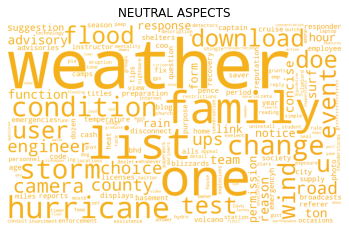

In [20]:
ochre_mask = np.array(Image.open("yellow_pattern.jpg"))
ochre_color = ImageColorGenerator(ochre_mask)

wc2 = WordCloud(mask = ochre_mask, color_func = ochre_color, background_color = "white", collocations = False).generate(data_neu)

plt.imshow(wc2)
plt.title("NEUTRAL ASPECTS")
plt.axis("off")
plt.show()

#### Creating WordCloud for Negative Aspects 

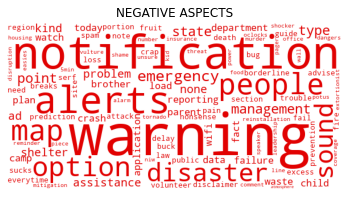

In [21]:
red_mask = np.array(Image.open("red_pattern.jpg"))
red_color = ImageColorGenerator(red_mask)

wc3 = WordCloud(mask = red_mask, color_func = red_color, background_color = "white", collocations = False).generate(data_neg)

plt.imshow(wc3)
plt.title("NEGATIVE ASPECTS")
plt.axis("off")
plt.show()